In [14]:
# Python para finanças: uma análise de dados da Bolsa de Valores de São Paulo (BOVESPA)
# Repositório: https://github.com/alexcamargoweb/python-finances
# Adaptado de Jones Granatyr - https://iaexpert.academy
# Arquivo: python_finances.ipynb

# monta o Google Drive
from google.colab import drive, output
drive.mount('/content/drive')
%cd /content/drive/MyDrive/python-finances/
output.clear()

/content/drive/MyDrive/python-finances


In [2]:
# importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # gráficos dinâmicos (interativos)

In [4]:
# BASE DE DADOS COM UMA AÇÃO - preço das ações online

# DataReader lê dados online de uma lista de sites (iex, fred, yahoo)
gol_df = data.DataReader(name = 'GOLL4.SA', data_source='yahoo', start='2015-01-01') 

In [5]:
# exibe o dataframe pesquisado 
# valores: maior, menor, abertura, fechamento, volume de negociação, fechamento ajustado)
gol_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,15.200000,14.610000,14.970000,14.990000,901900.0,14.990000
2015-01-05,15.010000,14.410000,14.900000,14.850000,1272500.0,14.850000
2015-01-06,15.210000,14.650000,14.750000,15.210000,2183500.0,15.210000
2015-01-07,15.330000,14.550000,15.150000,14.550000,1846900.0,14.550000
2015-01-08,14.650000,14.200000,14.410000,14.270000,1569500.0,14.270000
...,...,...,...,...,...,...
2021-01-18,24.940001,23.580000,24.010000,23.790001,8911200.0,23.790001
2021-01-19,24.280001,23.030001,24.090000,23.240000,6863200.0,23.240000
2021-01-20,23.700001,22.530001,23.459999,23.230000,6392100.0,23.230000


In [6]:
# informações sobre a base de dados
gol_df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1503 entries, 2015-01-02 to 2021-01-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1503 non-null   float64
 1   Low        1503 non-null   float64
 2   Open       1503 non-null   float64
 3   Close      1503 non-null   float64
 4   Volume     1503 non-null   float64
 5   Adj Close  1503 non-null   float64
dtypes: float64(6)
memory usage: 82.2 KB


In [7]:
# mostra os primeiros registros
gol_df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,15.20,14.61,14.97,14.99,901900.0,14.99
2015-01-05,15.01,14.41,14.90,14.85,1272500.0,14.85
2015-01-06,15.21,14.65,14.75,15.21,2183500.0,15.21


In [8]:
# mostra os últimos registros
gol_df.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-20,23.700001,22.530001,23.459999,23.230000,6392100.0,23.230000
2021-01-21,23.250000,22.410000,23.129999,22.760000,5807400.0,22.760000
2021-01-22,23.120001,21.719999,22.040001,22.950001,6524200.0,22.950001


In [9]:
# exibe algumas estatísticas
gol_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1503.000000,1503.000000,1503.000000,1503.000000,1.503000e+03,1503.000000
mean,15.309800,14.542216,14.935709,14.901184,4.730372e+06,14.901184
std,10.397604,10.003285,10.202239,10.198631,4.911382e+06,10.198631
min,1.180000,1.130000,1.160000,1.160000,0.000000e+00,1.160000
25%,7.110000,6.660000,6.895000,6.915000,1.814150e+06,6.915000
50%,12.840000,12.000000,12.450000,12.370000,3.037800e+06,12.370000
75%,21.735000,20.510000,21.085000,21.005000,5.822350e+06,21.005000
max,44.619999,41.310001,43.669998,43.790001,4.368050e+07,43.790001


In [10]:
# analisa o valor de fechamento
gol_df[gol_df['Close'] >= 43.79]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-01,44.619999,41.25,41.25,43.790001,6664200.0,43.790001


In [11]:
gol_df[(gol_df['Close'] >= 1.15) & (gol_df['Close'] <= 1.16)]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-22,1.26,1.14,1.2,1.16,3830600.0,1.16


In [18]:
# salva o dataframe em um arquivo CSV (para trabalhar offline, se necessário)
gol_df.to_csv('/content/drive/MyDrive/python-finances/datasets/gol.csv')

In [19]:
# lê e exibe o conjunto de dados
gol_df2 = pd.read_csv('/content/drive/MyDrive/python-finances/datasets/gol.csv')
gol_df2

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,15.200000,14.610000,14.970000,14.990000,901900.0,14.990000
1,2015-01-05,15.010000,14.410000,14.900000,14.850000,1272500.0,14.850000
2,2015-01-06,15.210000,14.650000,14.750000,15.210000,2183500.0,15.210000
3,2015-01-07,15.330000,14.550000,15.150000,14.550000,1846900.0,14.550000
4,2015-01-08,14.650000,14.200000,14.410000,14.270000,1569500.0,14.270000
...,...,...,...,...,...,...,...
1498,2021-01-18,24.940001,23.580000,24.010000,23.790001,8911200.0,23.790001
1499,2021-01-19,24.280001,23.030001,24.090000,23.240000,6863200.0,23.240000
1500,2021-01-20,23.700001,22.530001,23.459999,23.230000,6392100.0,23.230000
1501,2021-01-21,23.250000,22.410000,23.129999,22.760000,5807400.0,22.760000


In [20]:
# BASE DE DADOS COM MAIS AÇÕES - preço das ações online

# BOVA11: https://www.sunoresearch.com.br/artigos/bova11/

# seleciona as ações (o BOVA11 é usado como comparativo as demais)
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [21]:
# busca os dados das ações (somente o Close, ou seja o valor de fechamento da ação)
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

In [22]:
# exibe as datas e as ações
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2021-01-18,23.790001,20.160000,92.209999,24.450001,28.799999,116.686951
2021-01-19,23.240000,19.870001,89.599998,24.080000,29.520000,115.629997
2021-01-20,23.230000,19.799999,88.699997,25.420000,29.870001,115.070000


In [23]:
# renomeia as colunas do dataframe
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

In [24]:
# exibe os novos valores do cabeçalho
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,15.20,11.846153,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,11.926923,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,11.750000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,11.615384,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,11.811538,0.240000,10.995774,48.509998


In [25]:
# verifica se há valores nulos
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    4
dtype: int64

In [26]:
# mostra o total de registros
acoes_df.shape

(1503, 6)

In [27]:
# exclui os registros nulos
acoes_df.dropna(inplace=True)

In [28]:
# mostra o total de registros
acoes_df.shape

(1499, 6)

In [29]:
# verifica novamente se há valores nulos
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [30]:
# grava os registros num arquivo CSV
acoes_df.to_csv('/content/drive/MyDrive/python-finances/datasets/acoes.csv')

In [31]:
# lê o arquivo e exibe os valores
acoes_df = pd.read_csv('/content/drive/MyDrive/python-finances/datasets/acoes.csv')
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1494,2021-01-18,23.790001,20.160000,92.209999,24.450001,28.799999,116.686951
1495,2021-01-19,23.240000,19.870001,89.599998,24.080000,29.520000,115.629997
1496,2021-01-20,23.230000,19.799999,88.699997,25.420000,29.870001,115.070000
1497,2021-01-21,22.760000,19.260000,87.650002,25.490000,29.750000,114.459999


In [32]:
# retorna o nome de todas as colunas
acoes_df.columns[1:]

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [33]:
# visualiza algumas estatísticas prontas
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,14.885497,32.352951,22.974688,5.337282,13.561098,73.099824
std,10.207435,16.058724,17.611473,6.965742,5.911888,20.795718
min,1.160000,6.490000,9.884615,0.030585,7.156402,36.450001
25%,6.895000,18.085000,12.705769,0.209863,9.832983,54.990000
50%,12.350000,27.950001,17.107693,2.459375,10.732940,72.000000
75%,21.005000,47.250000,22.285000,7.231562,15.186666,91.990002
max,43.790001,64.800003,92.209999,27.450001,31.070000,120.400002


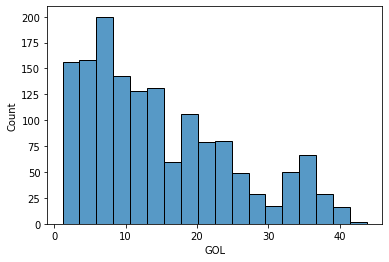

In [34]:
# HISTOGRAMA

# acessa os valores da ação da Gol (valores mais comuns)
sns.histplot(acoes_df['GOL']); # valor (concentração) versus qnt de registros

In [35]:
len(acoes_df.columns)

7

In [36]:
np.arange(1, len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6])

In [ ]:
# percorre o histograma das ações do dataframe
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True) # desenha uma linha de densidade
  plt.title(acoes_df.columns[i]) # qnt de registros versus valor (concentração)

In [37]:
acoes_df['GOL'].describe()

count    1499.000000
mean       14.885497
std        10.207435
min         1.160000
25%         6.895000
50%        12.350000
75%        21.005000
max        43.790001
Name: GOL, dtype: float64

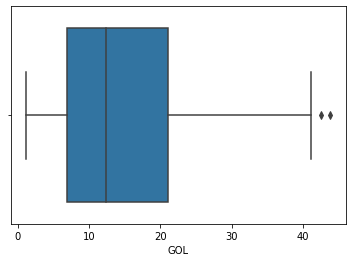

In [38]:
# BOXPLOT (valores min e máx)

# busca as ações da Gol
sns.boxplot(x = acoes_df['GOL']); 
# os pontos a direita são os outliers
# as divisões do retângulo (mediana) são: 1º quartil e 2º quartil

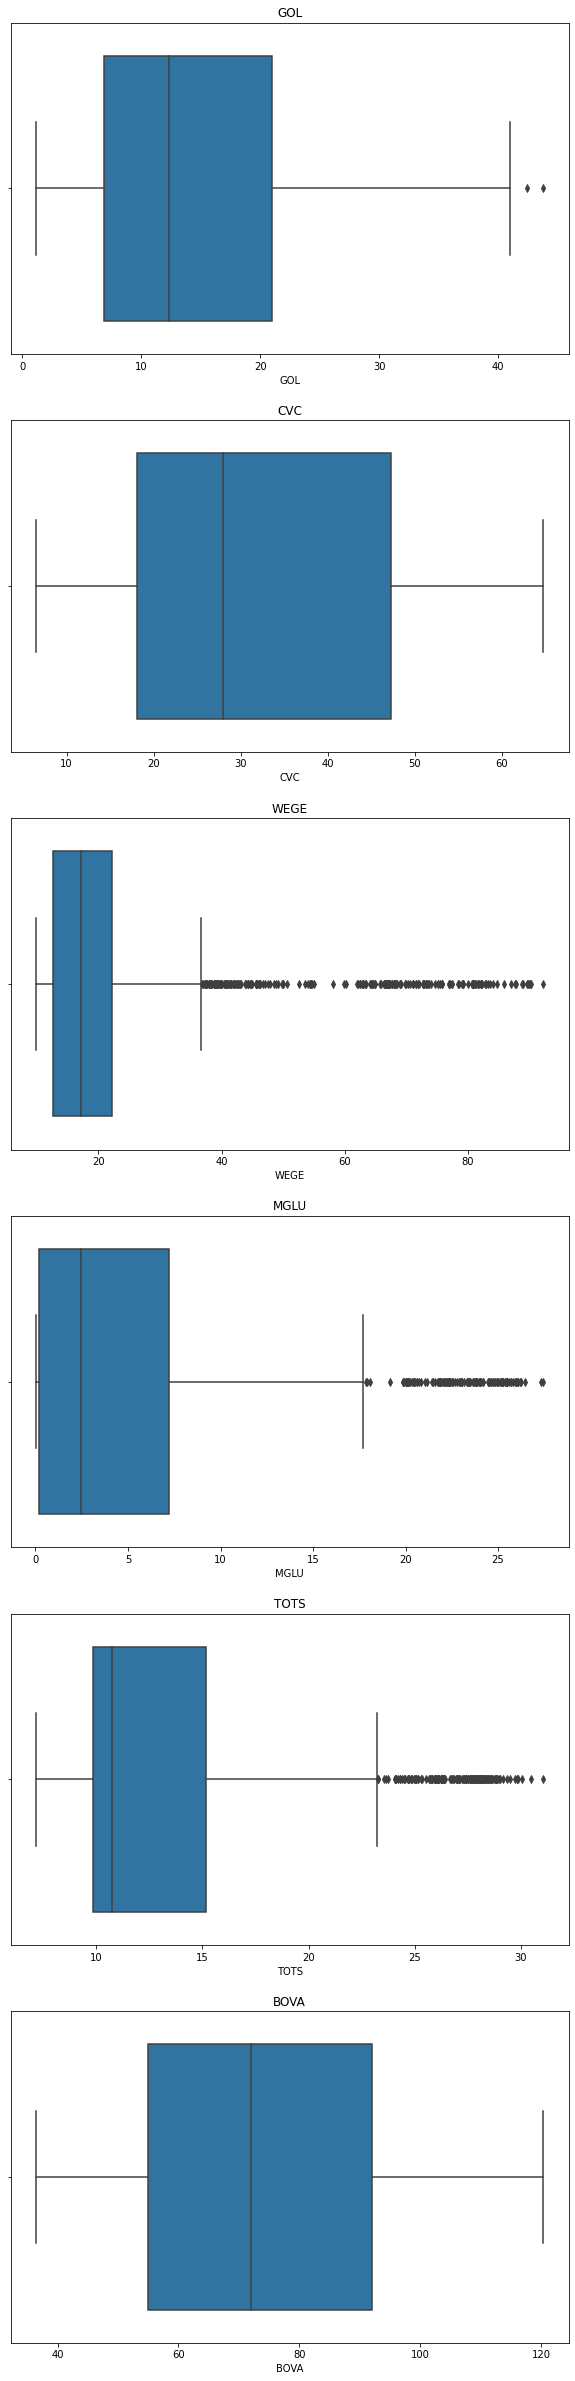

In [39]:
# exibe cada uma das empresas
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

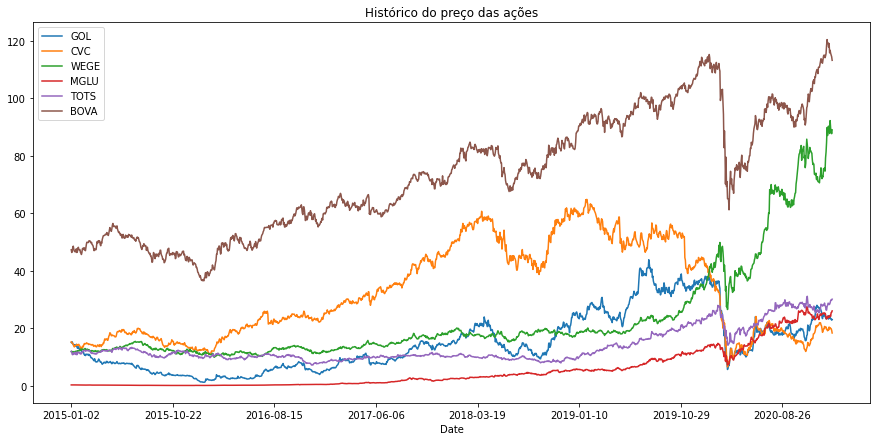

In [40]:
# GRÁFICO DE LINHAS: crescimento de cada empresa
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações'); # valores não normalizados

In [41]:
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1494,2021-01-18,23.790001,20.160000,92.209999,24.450001,28.799999,116.686951
1495,2021-01-19,23.240000,19.870001,89.599998,24.080000,29.520000,115.629997
1496,2021-01-20,23.230000,19.799999,88.699997,25.420000,29.870001,115.070000
1497,2021-01-21,22.760000,19.260000,87.650002,25.490000,29.750000,114.459999


In [42]:
# divide todos os valores pelo primeiro/menor valor (para todas as empresas)
# cria um novo dataframw
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [43]:
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980519,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1494,2021-01-18,1.587058,1.326316,7.783961,105.020362,2.417993,2.469043
1495,2021-01-19,1.550367,1.307237,7.563637,103.431093,2.478443,2.446678
1496,2021-01-20,1.549700,1.302632,7.487662,109.186811,2.507829,2.434829
1497,2021-01-21,1.518346,1.267105,7.399026,109.487481,2.497754,2.421921


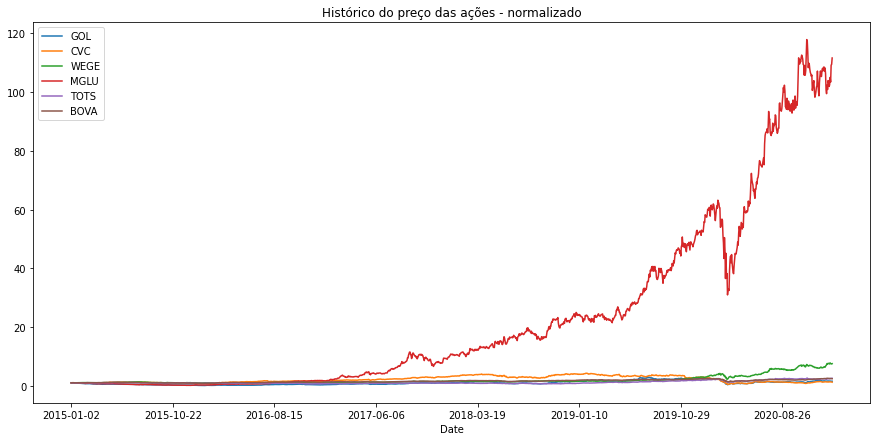

In [44]:
# exibe o gráfico normalizado
# importante notar que a MGLU mesmo com ações de menor valor, foi a que mais cresceu
acoes_df_normalizado.plot(x = 'Date', 
                          figsize = (15,7), 
                          title = 'Histórico do preço das ações - normalizado'); # valores normalizados

In [45]:
# GRÁFICOS DINÂMICOS

# criação dos gráficoS anteriores, porém dinâmicos (detalhes com o cursor do mouse)
figura = px.line(title = 'Histórico do preço das ações') # plotly_express
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show() # é possível baixar a foto, dar zoom, seleção por período, etc

In [46]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()